<a href="https://colab.research.google.com/github/cyber-puca/GUH2021/blob/main/time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import tensorflow as tf
import pandas as pd
import csv
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('drive/MyDrive/car_rental_huge.csv')
data = data.drop(columns = ['Unnamed: 0', 'Booking Number', 'Price', 'Origin Lat', 'Origin Lon', 'Haul', 'Hour', 'Year'])
security_data = data.drop(columns=['Transport', 'Time Taken', 'Distance'])
bus_data = data[data['Transport']==1]
bus_data = bus_data.drop(columns='Transport')
walk_data = data[data['Transport']==0]
walk_data = walk_data.drop(columns='Transport')

security_x = []
security_y = []
for idx, rows in security_data.iterrows():
  vals = [rows['Dest Lat'], rows['Dest Lon'], rows['Day'], rows['Date'], rows['Month']]
  security_x.append(vals)
  security_y.append(rows['Wait'])
security_x = np.array(security_x)
security_y = np.array(security_y)

bus_x = []
bus_y = []
for idx, rows in bus_data.iterrows():
  vals = [rows['Dest Lat'], rows['Dest Lon'], rows['Day'], rows['Date'], rows['Month'], rows['Distance']]
  bus_x.append(vals)
  bus_y.append(rows['Wait'])
bus_x = np.array(bus_x)
bus_y = np.array(bus_y)

walk_x = []
walk_y = []
for idx, rows in walk_data.iterrows():
  vals = [rows['Dest Lat'], rows['Dest Lon'], rows['Day'], rows['Date'], rows['Month'], rows['Distance']]
  walk_x.append(vals)
  walk_y.append(rows['Wait'])
walk_x = np.array(walk_x)
walk_y = np.array(walk_y)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
security_x.shape

(1000000, 7)

In [6]:
walk_x.shape

(624810, 8)

In [15]:
bus_x.shape

(375190, 8)

In [105]:
############ defining the models ############
security_model = Sequential()
bus_model = Sequential()
walk_model = Sequential()

# Adding the input layer and the first hidden layer
security_model.add(Dense(20, activation = 'relu', input_dim = 5))
bus_model.add(Dense(20, activation = 'relu', input_dim = 6))
walk_model.add(Dense(20, activation = 'relu', input_dim = 6))

neurons = 32

for i in range(10):
  # Adding a hidden layer
  security_model.add(Dense(units = neurons, activation = 'relu'))
  bus_model.add(Dense(units = neurons, activation = 'relu'))
  walk_model.add(Dense(units = neurons, activation = 'relu'))

# Adding the output layer
security_model.add(Dense(units = 1))
bus_model.add(Dense(units = 1))
walk_model.add(Dense(units = 1))

Epoch 1/10
2500/2500 [==============================] - 13s 5ms/step - loss: 3344.5847 - val_loss: 697.3657
Epoch 2/10
2500/2500 [==============================] - 11s 5ms/step - loss: 286.3799 - val_loss: 3.7402
Epoch 3/10
2500/2500 [==============================] - 11s 4ms/step - loss: 916.3831 - val_loss: 30.2675
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 281.4917 - val_loss: 3.3975
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 118.6782 - val_loss: 8795.0068
Epoch 6/10
2500/2500 [==============================] - 12s 5ms/step - loss: 1087.6385 - val_loss: 454.6656
Epoch 7/10
2500/2500 [==============================] - 11s 5ms/step - loss: 311.5517 - val_loss: 222.7062
Epoch 8/10
2500/2500 [==============================] - 11s 4ms/step - loss: 103.1864 - val_loss: 0.6885
Epoch 9/10
2500/2500 [==============================] - 11s 4ms/step - loss: 104.4978 - val_loss: 1.1212
Epoch 10/10
2500/2500 [====================

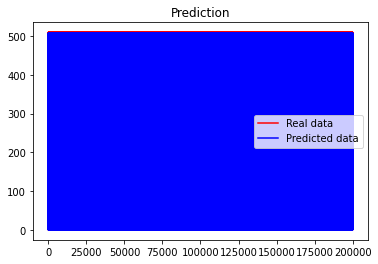

In [96]:
########## running security model###########
X_train, X_test, y_train, y_test = train_test_split(security_x, security_y, test_size = 0.2)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

security_model.compile(optimizer = 'adam',loss = 'mean_squared_error')
security_model.fit(X_train, y_train, batch_size = 256, epochs = 10, validation_split=0.2)
security_model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
security_model.fit(X_train, y_train, batch_size = 256, epochs = 10, validation_split=0.2)

y_pred = security_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=True)
print(rms)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [97]:
y_pred = security_model.predict([[40.639801, -73.7789, 3, 6, 2]])
print("180")
print(y_pred)

y_pred = security_model.predict([[-33.94609833, 151.177002, 6, 11, 1]])
print("390")
print(y_pred)

y_pred = security_model.predict([[49.1939016, -123.1839981, 3, 26, 6]])
print("60")
print(y_pred)

180
[[179.25629]]
390
[[385.50934]]
60
[[58.922]]


Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 10815.3281 - val_loss: 8504.4336
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 8321.5801 - val_loss: 7861.8345
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 8159.5283 - val_loss: 7786.9609
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 7974.4702 - val_loss: 9163.1982
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 7883.3140 - val_loss: 7648.9722
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 7573.3687 - val_loss: 7684.8179
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 7099.6743 - val_loss: 7336.2939
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 6767.0034 - val_loss: 6955.5908
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 6771.1138 - val_loss: 9096.0146
Epoch 10/10
938/938 [========================

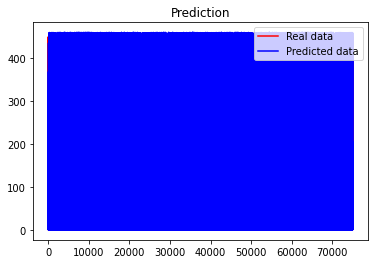

In [98]:
########## running bus model ############
X_train, X_test, y_train, y_test = train_test_split(bus_x, bus_y, test_size = 0.2)

bus_model.compile(optimizer = 'adam',loss = 'mean_squared_error')
bus_model.fit(X_train, y_train, batch_size = 256, epochs = 10, validation_split=0.2)
bus_model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
bus_model.fit(X_train, y_train, batch_size = 256, epochs = 10, validation_split=0.2)

y_pred = bus_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=True)
print(rms)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [99]:
y_pred = bus_model.predict([[40.639801, -73.7789, 3, 6, 2, 2500]])
print("188")
print(y_pred)

y_pred = bus_model.predict([[51.4706, -0.461941, 5, 25, 12, 800]])
print("242")
print(y_pred)

y_pred = bus_model.predict([[45.47060013, -73.74079895, 7, 10, 1, 2500]])
print("68")
print(y_pred)

188
[[183.05087]]
242
[[249.52728]]
68
[[47.932243]]


In [108]:
############### running walk model ##############
X_train, X_test, y_train, y_test = train_test_split(walk_x, walk_y, test_size = 0.2)

walk_model.compile(optimizer = 'adam',loss = 'mean_squared_error')
walk_model.fit(X_train, y_train, batch_size = 256, epochs = 10, validation_split=0.2)
walk_model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
walk_model.fit(X_train, y_train, batch_size = 256, epochs = 20, validation_split=0.2)

y_pred = walk_model.predict(X_test)

# from sklearn.metrics import mean_squared_error
# rms = mean_squared_error(y_test, y_pred, squared=True)
# print(rms)

# plt.plot(y_test, color = 'red', label = 'Real data')
# plt.plot(y_pred, color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 6062.2139 - val_loss: 5477.1265
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 5461.3511 - val_loss: 5662.9424
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 4619.7070 - val_loss: 5750.2510
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 4289.6245 - val_loss: 5014.9722
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3874.3503 - val_loss: 9793.1387
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3286.1309 - val_loss: 6567.0801
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2095.9070 - val_loss: 455.7090
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1493.7423 - val_loss: 3080.9026
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1184.4221 - val_loss: 7515.1045
Epoch 10/10
1563/1563 [======

In [109]:
y_pred = walk_model.predict([[53.35369873, -2.274950027, 7, 29, 11, 1000]])
print("196")
print(y_pred)

y_pred = walk_model.predict([[-33.94609833, 151.177002, 6, 11, 1, 100]])
print("212")
print(y_pred)

y_pred = walk_model.predict([[49.1939016, -123.1839981, 3, 26, 6, 3400]])
print("115")
print(y_pred)

196
[[178.75291]]
212
[[394.1416]]
115
[[35.844868]]


In [102]:
from google.colab import files
security_model.save('securitymodel.h5')
files.download('securitymodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
from google.colab import files
bus_model.save('busmodel.h5')
files.download('busmodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
from google.colab import files
walk_model.save('walkmodel.h5')
files.download('walkmodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>